<div style="width:100%;height:100px;text-align:center;border: 4px solid green;background-color:green;color:white">
<h2 style="text-align: center">Chapter 2</h2>
<h4>Introduce Keras.part1</h4>
</div> 

<div style='border: 4px solid green;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

# Brief contents:

<div style="position: relative;height:100px;">
    
<div style="width:300px;position:absolute;left: auto;border:4px;border: 4px solid green;background-color:green;color:white">
    <header></header>
    <a href="#dummy_model" style="padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Build dummy model</b></h4>
      </a>
 </div>
    
 <div style="width:300px;position:absolute;left: 305px;border:4px;border: 4px solid green;background-color:green;color:white">
    <header></header>
    <a href="#Feed_model:"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Feed model:</b></h4>
      </a>
     
  </div>
    <div style="width:300px;position:absolute;left: 610px;border:4px;border: 4px solid green;background-color:green;color:white">
    <header></header>
    <a href="#list"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b> </b></h4>
      </a>
        </div>

    
   <div style="width:300px;position:absolute;left: 915px;border:4px;border: 4px solid green;background-color:green;color:white">
    <header></header>
    <a href="#list"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b></b></h4>
      </a>
    </div>
  
    
   <div style="width:300px;position:absolute;left: 1220px;border:4px;border: 4px solid green;background-color:green;color:white">
    <header></header>
    <a href="#"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b></b></h4>
      </a>
    </div>
</div>



<div style="width:100%;height:70px;border: 4px solid green;background-color:green;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>Introduction to Deep Learning with Keras and Tensorflow || by Rodrigo Agundez<h1></div>

<div  style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
        
   https://www.youtube.com/watch?v=45MbmHQ5iMY

   https://github.com/rragundez/PyDataAmsterdam2018
    </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from farhad.utils import plot_training_summary
from farhad.utils import TimeSummary
from farhad.utils import set_seed

import inspect

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)
Using TensorFlow backend.


In [ ]:
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6

<div id="dummy_model" style="width:100%;height:70px;border: 4px solid green;background-color:green;color:white;text-align:center;border-radius: 25px;padding:3px"><h1>Build dummy model<h1></div>

<img src="https://github.com/rragundez/PyDataAmsterdam2018/raw/94ba390d7bf5f13c5e8242fb67e9e350785e24e2/images/model_diagram.gif">

In [2]:
from keras.models import Sequential 
from keras.layers import Dense

<b>Note:</b><br>
First, you make a Model (Sequential) <br>
we have three layer (Danse)<br>
in first layer, you should  adjust the shpae of input. (for other layer keras adjust automatic)<br>
Every layer need activaton funcation.  (activation="")<br> 
For Every layer, you needs to adjust number of nodes. (first layer has three nodes (nurones). second layer has two, last layer has one nodes ) <br>


In [3]:
model = Sequential(name='DummyModel')

- Sequential is easier api fo keras : layer coming after by after (Don't coming back anf branching and reconnecting)
- Other keras api is funtional api.

In [4]:
model.add(Dense(3,activation='relu',input_dim=2,name="first_layer"))
# first layer, you should become clear diagrame input with input_dim and .., 
#activation funcation is choose accroding your model. becuse we want to any node have contion with input, we choose relu. (according figure)
# 3 is number of nodes



In [5]:
model.add(Dense(2,activation='relu',name='secound_layer'))
model.add(Dense(1, activation='sigmoid', name='third_layer'))
# activation is sigmod to give us a normal result.

In [ ]:
model.summary()

<b>First_lauer: 9 parameter => (w11 , w12 , w21, w22,w13,w23, b1, b2, b3 )( for example for first node: f1 = w1.x1 + w2.x2 + b1)

In [6]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 3)                 9         
_________________________________________________________________
secound_layer (Dense)        (None, 2)                 8         
_________________________________________________________________
third_layer (Dense)          (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.get_config())

<div id="Feed_model" style="width:100%;height:70px;border: 4px solid green;background-color:green;color:white;text-align:center;border-radius: 25px;padding:3px"><h1>Feed model<h1></div>

In [8]:
moons =pd.read_csv('moons.csv')
moons.sample(2)

,Unnamed: 0,x1,x2,y
130,520,1.029599,0.568886,0
131,524,0.758060,0.670410,0


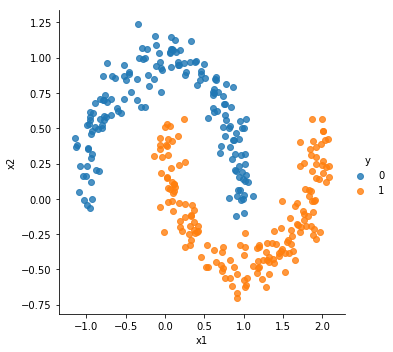

In [9]:
sns.lmplot(data=moons, x='x1', y='x2', hue='y', fit_reg=False)

In [10]:
#separate in train and test data
train_index = moons.sample(frac=0.8, random_state=21).index
X_train, y_train = moons.iloc[train_index][['x1', 'x2']], moons.iloc[train_index]['y']
X_test, y_test = moons.drop(index=train_index)[['x1', 'x2']], moons.drop(index=train_index)['y']

In [11]:
time_summary = TimeSummary()

Test loss: 0.6811575640493365
Test accuracy: 0.6417910447761194
Training time: 0:00:00.944022(HH:MM:SS)
Epoch time avg: 0:00:00.047171(HH:MM:SS)


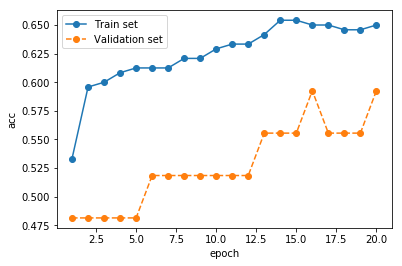

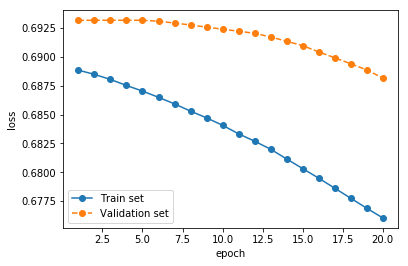

In [12]:
summary = model.fit(
    X_train, y_train,
    batch_size=100, 
    epochs=20,
    validation_split=0.1,
    verbose=0,
    callbacks=[time_summary]
)
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_training_summary(summary, time_summary)

- Number of samples per gradient update,
- Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
- verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
- callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training.
- Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

<div style="width:100%;height:70px;border: 4px solid #179871;background-color:#179871;color:white;text-align:center;border-radius: 25px;padding:3px">

<header>
  <h1>+PLus Theory:</h1>
</header>

<div> 

This section, I describe theory behind any function that is used in this chapter. <br>
Chapter 2.2 is dedicated to Theory (that I called PLus Theroy seeion.)

## relu activation funcation:

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
        </div>

<img   src="https://wikimedia.org/api/rest_v1/media/math/render/svg/26064d2e9232bbb8579577982d29e7f374b08003">

<img  src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/440px-Rectifier_and_softplus_functions.svg.png">
<div>
Blue is relu
</div>

## sigmoid acticvation funcation:

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
https://en.wikipedia.org/wiki/Sigmoid_function
    </div>

<img   src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9537e778e229470d85a68ee0b099c08298a1a3f6">

<img   src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png">

## optimazer Adam:

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
    
https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

paper:
https://arxiv.org/abs/1212.5701
    
</div>

In [ ]:
keras.optimizers.Adam(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

Arguments

- lr: float >= 0. Initial learning rate, defaults to 1. It is recommended to leave it at the default value.
- rho: float >= 0. Adadelta decay factor, corresponding to fraction of gradient to keep at each time step.
- epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
- decay: float >= 0. Initial learning rate decay.

<b> Adam was presented at a very prestigious conference for deep learning practitioners — ICLR 2015. The paper contained some very promising diagrams, showing huge performance gains in terms of speed of training. However, after a while people started noticing, that in some cases Adam actually finds worse solution than stochastic gradient descent. A lot of research has been done to address the problems of Adam. but works really well in on-line settings.

## binary_crossentropy

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
    
https://en.wikipedia.org/wiki/Cross_entropy
 </div>

<img   src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0cb6da032ab424eefdca0884cd4113fe578f4293">

it is usually used for when we have more  than one class <br>
funcation : $ E[p,q] = ∑p_{i} log(q_{i})$ <br>
( estimated probability of outcome i is $q_{i}$ )<br>
( frequency (empirical probability) of outcome i in the training set $p_{i}$)

<b>metrics:</b> <br>
List of metrics to be evaluated by the model
            during training and testing.
            Typically you will use `metrics=['accuracy']`.
            To specify different metrics for different outputs of a
            multi-output model, you could also pass a dictionary,
            such as `metrics={'output_a': 'accuracy'}`.

## TimeSummary :


In [2]:
from farhad.utils import TimeSummary
import inspect

In [3]:
time_summary = TimeSummary()
print(inspect.getsource(TimeSummary))

class TimeSummary(Callback):
    def on_train_begin(self, logs={}):
        self.epoch_times = []
        self.training_time = time.process_time()

    def on_train_end(self, logs={}):
        self.training_time = time.process_time() - self.training_time

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.process_time()

    def on_epoch_end(self, batch, logs={}):
        self.epoch_times.append(time.process_time() - self.epoch_time_start)



## plot_training_summary

In [4]:
from farhad.utils import plot_training_summary

In [5]:
print(inspect.getsource(plot_training_summary))

def plot_training_summary(training_summary, time_summary=None):
    if time_summary:
        print('Training time: '
              f'{timedelta(seconds=time_summary.training_time)}(HH:MM:SS)')
        print('Epoch time avg: '
              f'{timedelta(seconds=mean(time_summary.epoch_times))}(HH:MM:SS)')
    hist = sorted(training_summary.history.items(),
                  key=lambda x: (x[0].replace('val_', ''), x[0]))

    epochs = [e + 1 for e in training_summary.epoch]
    for metric, values in groupby(hist,
                                  key=lambda x: x[0].replace('val_', '')):
        if 'val_loss' in training_summary.history:
            val0, val1 = tuple(values)
            plt.plot(epochs, val0[1], epochs, val1[1], '--', marker='o')
        else:
            val0 = tuple(values)[0]
            plt.plot(epochs, val0[1], '--', marker='o')
        plt.xlabel('epoch'), plt.ylabel(val0[0])
        plt.legend(('Train set', 'Validation set'))
        plt.show()



## model fit :

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
    </div>

In [ ]:
fit(x=None, y=None, 
    batch_size=None, 
    epochs=1, verbose=1, 
    callbacks=None, 
    validation_split=0.0, 
    validation_data=None, 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0, 
    steps_per_epoch=None, 
    validation_steps=None)

Arguments:

x: Numpy array of training data (if the model has a single input), or list of Numpy arrays (if the model has multiple inputs). If input layers in the model are named, you can also pass a dictionary mapping input names to Numpy arrays.  x can be None (default) if feeding from framework-native tensors (e.g. TensorFlow data tensors).

y: Numpy array of target (label) data (if the model has a single output), or list of Numpy arrays (if the model has multiple outputs). If output layers in the model are named, you can also pass a dictionary mapping output names to Numpy arrays.  y can be None (default) if feeding from framework-native tensors (e.g. TensorFlow data tensors).

<b>batch_size:</b> Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. Note that in conjunction with initial_epoch,  epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.
- For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated through all samples of the network. A problem usually happens with the last set of samples. In our example we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training. See callbacks.

validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

validation_data: tuple (x_val, y_val) or tuple  (x_val, y_val, val_sample_weights) on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.  validation_data will override validation_split.

shuffle: Boolean (whether to shuffle the training data before each epoch) or str (for 'batch'). 'batch' is a special option for dealing with the limitations of HDF5 data; it shuffles in batch-sized chunks. Has no effect when steps_per_epoch is not None.

class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.

sample_weight: Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only). You can either pass a flat (1D) Numpy array with the same length as the input samples (1:1 mapping between weights and samples), or in the case of temporal data, you can pass a 2D array with shape  (samples, sequence_length), to apply a different weight to every timestep of every sample. In this case you should make sure to specify  sample_weight_mode="temporal" in compile().

initial_epoch: Integer. Epoch at which to start training (useful for resuming a previous training run).
steps_per_epoch: Integer or None. Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.

validation_steps: Only relevant if steps_per_epoch is specified. Total number of steps (batches of samples) to validate before stopping.
<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
https://keras.io/models/model/
    
</div>